<a href="https://colab.research.google.com/github/willian2610/Digital-Image-Processing/blob/master/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries needed to perform the task

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Loading and plotting the image to be worked on

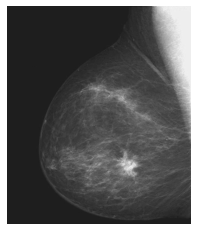

In [2]:
# Reading the image on grayscale
img = cv2.imread('Fig0304.tif', cv2.IMREAD_GRAYSCALE) 

plt.axis("off")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Convolution function by median filter

In [3]:
def median_filter_convolution (image, kernel_size):
    # Captures the dimensions of the image (height -> rows, width -> columns)
    height, width = image.shape 
    
    # Creates a border
    border = (kernel_size-1)//2 

    # Creates the matrix of the resulting image, based on its dimensions, but with all pixels at 0
    resulting_image = np.zeros((height, width)) 

    # Repeating loop responsible for traversing the image making the necessary operations for the application of the median filter
    for x in range(border, height-border):
        for y in range(border, width-border):
            # The pixel receives the median value of its "neighboring" pixels
            resulting_image[x,y] = np.median(image[x-border:x+border+1, y-border:y+border+1])
    
    return resulting_image

# Convolution function for Mean and Laplacian filters

In [4]:
def convolution (image, mask):
    # Captures the dimensions of the image (height -> rows, width -> columns)
    height, width = image.shape 

    # Creates a border
    border = (mask.shape[0]-1)//2

    # Creates an array to store the output image
    resulting_image = np.zeros((height, width)) 

    # The mask is reflected (rotates 180º) before being applied to the image
    mask = mask[::-1,::-1] 

    # Repeating loops that traverse the image performing the convolution
    for x in range(border, height-border):
        for y in range(border, width-border):
            resulting_image[x,y] = np.sum(image[x-border:x+border+1, y-border:y+border+1]*mask)
    
    return resulting_image

# Running the convolution functions

In [5]:
# Creating Kernel parameters

# Defines the kernel size
kernel_size = 3
# Creates the kernel matrix for the mean filter
mean_filter_kernel = np.ones((kernel_size,kernel_size))/(kernel_size**2) 
# Creates the kernel matrix for the Laplacian filter
laplacian_kernel = np.array([[ 1, 1, 1], [ 1, -8, 1], [ 1, 1, 1]]) # 8-connected neighborhood Laplacian filter kernel that includes diagonal terms

# Running Convolution functions
median_filter_result = median_filter_convolution(img, kernel_size)
mean_filter_result = convolution(img, mean_filter_kernel)
laplacian_filter_result = convolution(img, laplacian_kernel)


# Plotting results

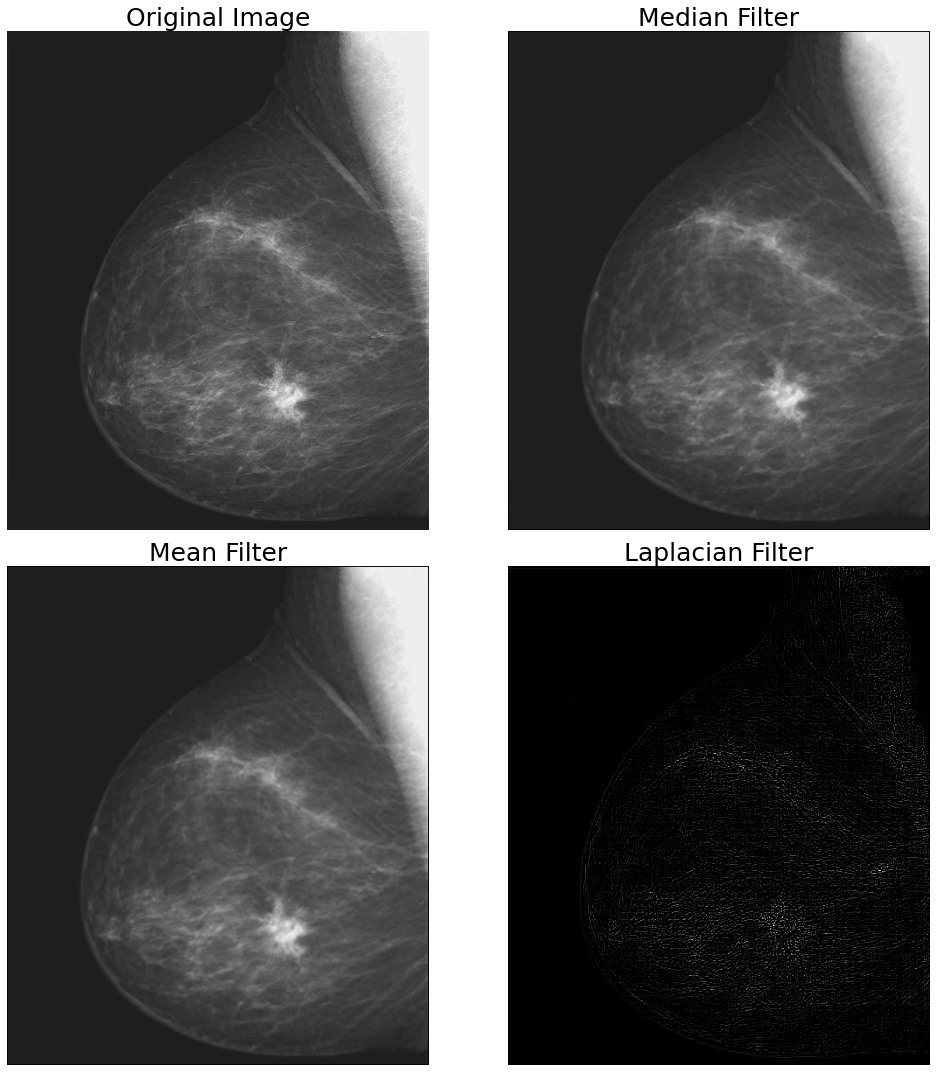

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.title("Original Image", fontsize=25)
plt.axis("off")
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title("Median Filter", fontsize=25)
plt.axis("off")
plt.imshow(median_filter_result, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.title("Mean Filter", fontsize=25)
plt.axis("off")
plt.imshow(mean_filter_result, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title("Laplacian Filter", fontsize=25)
plt.axis("off")
plt.imshow(laplacian_filter_result, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()